In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [560]:
data = pd.read_excel('insurance.xlsx')

In [561]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [562]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [563]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [564]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [565]:
data.duplicated().sum()

1

In [566]:
data.drop_duplicates(keep = 'first',inplace=True)

In [567]:
data.duplicated().sum()

0

In [568]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


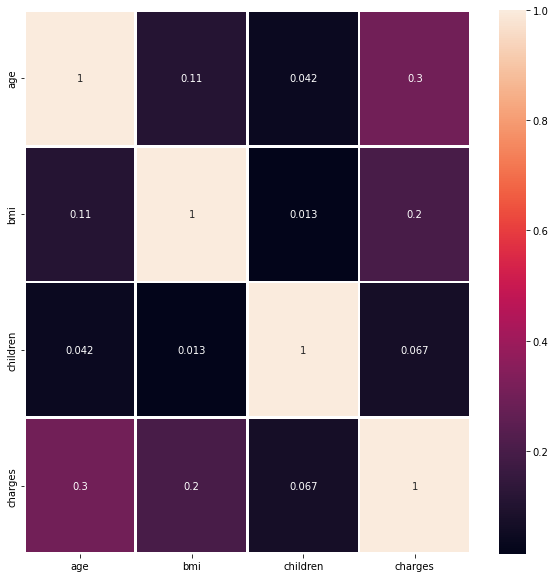

In [569]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidth=2)
plt.show()

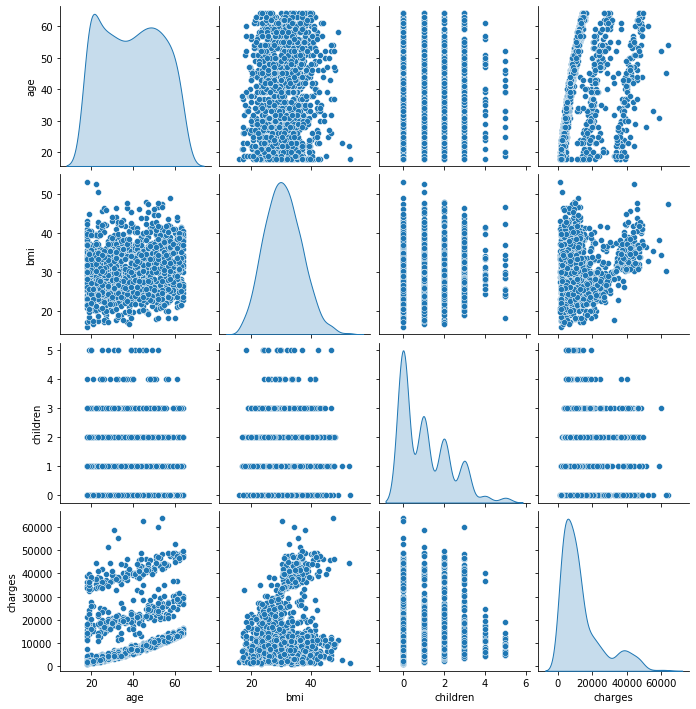

In [570]:
sns.pairplot(data,diag_kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


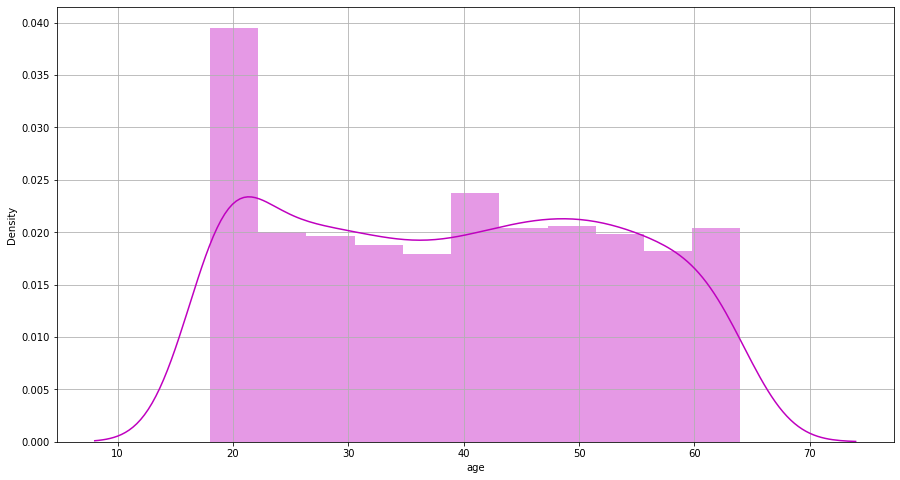

In [571]:
plt.figure(figsize=(15,8))
plt.grid()
sns.distplot(data['age'],color='m',kde=True,)

<function matplotlib.pyplot.show>

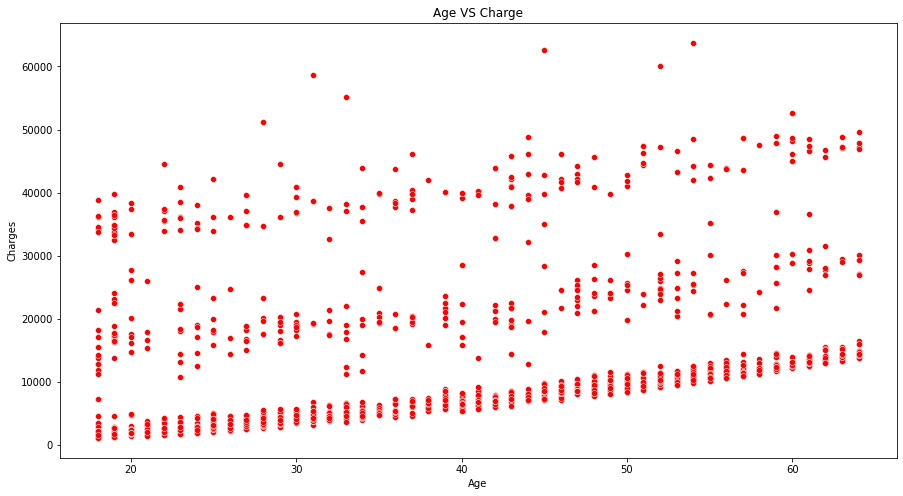

In [572]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=data['age'],y=data['charges'],color='r')
plt.title('Age VS Charge')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show

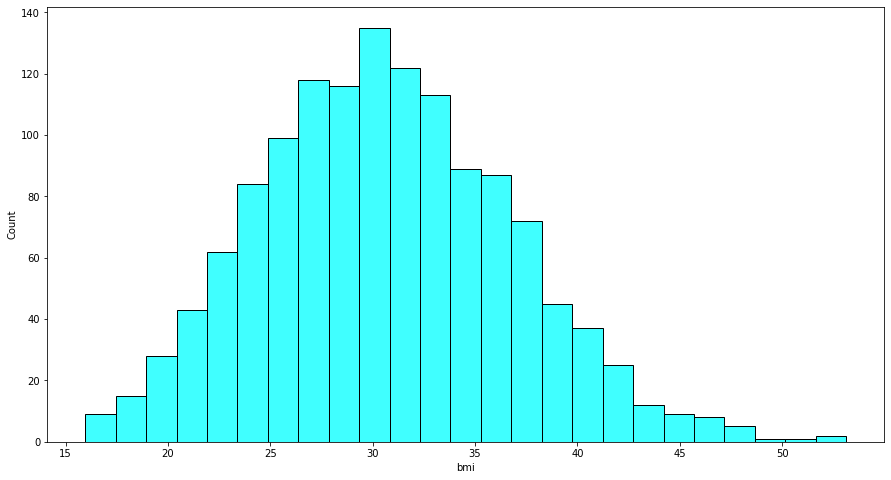

In [573]:
plt.figure(figsize=(15,8))
sns.histplot(data['bmi'],color='cyan',edgecolor='black')

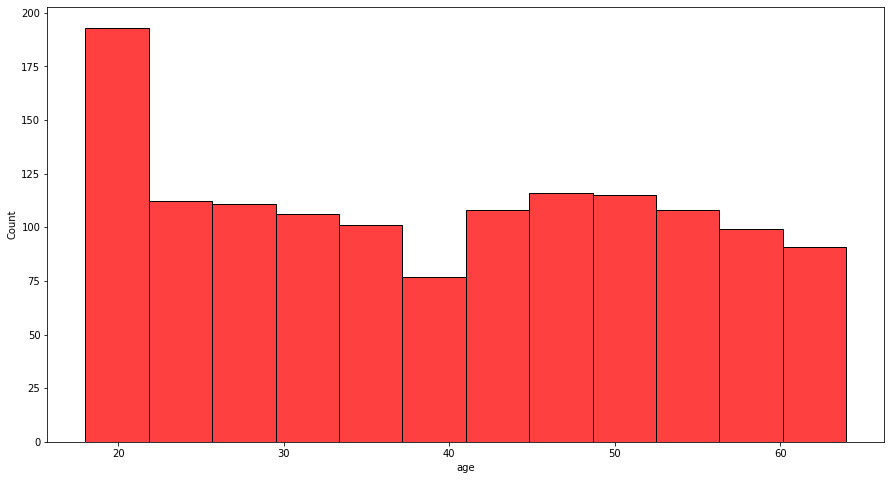

In [574]:
plt.figure(figsize=(15,8))
sns.histplot(data['age'],color='red',edgecolor='black')                   

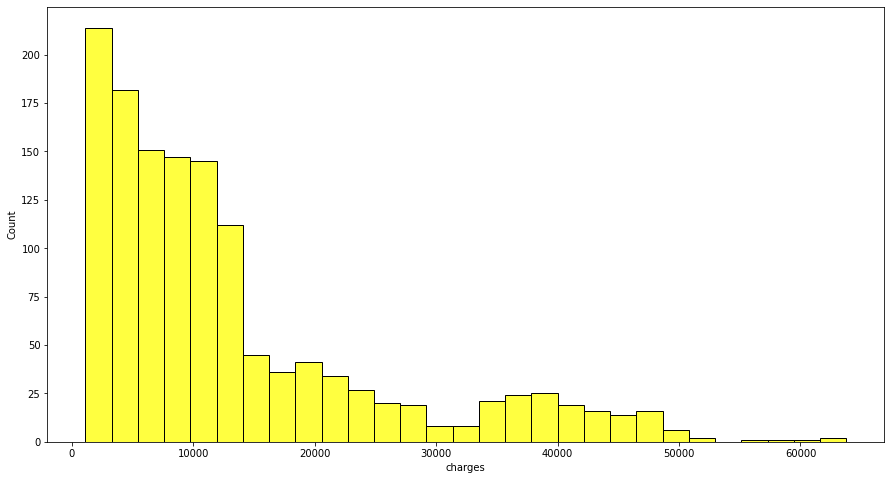

In [575]:
plt.figure(figsize=(15,8))
sns.histplot(data['charges'],color='yellow',edgecolor='black')

bmi looks normally distributed.





charges are right skewed



Age looks uniformly distributed.





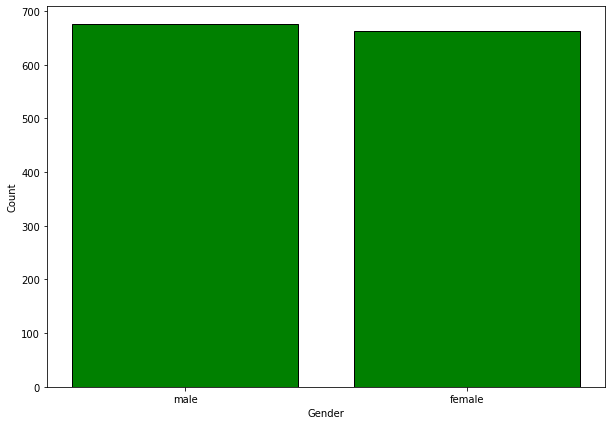

In [576]:
plt.figure(figsize=(10,7))
x1 = data.sex.value_counts().index
y1 = [data['sex'].value_counts()[i] for i in x1]  
plt.bar(x1,y1,color='green',edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

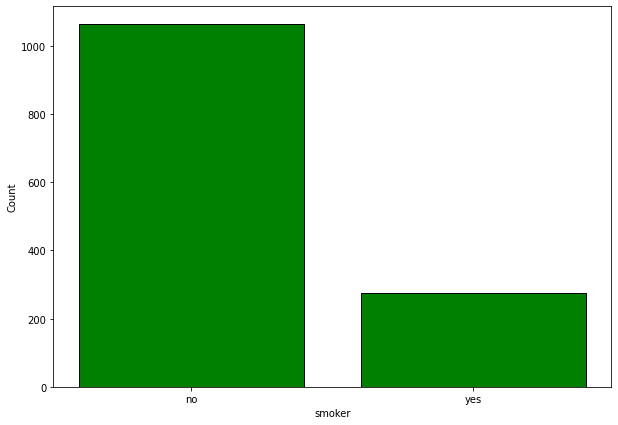

In [577]:
plt.figure(figsize=(10,7))
x2= data.smoker.value_counts().index
y2 = [data['smoker'].value_counts()[j] for j in x2]
plt.bar(x2,y2,color='green',edgecolor='black')
plt.xlabel('smoker')
plt.ylabel('Count')
plt.show()

There are lot more non-smokers than smokers.

Gender is distributed almost evenly


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Charges vs Age Filtered by Sex')

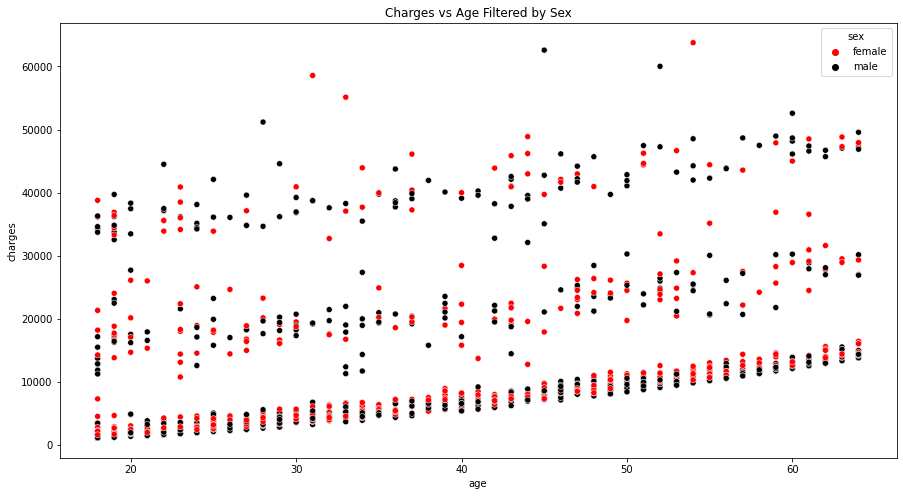

In [578]:
plt.figure(figsize=(15,8))
sns.scatterplot(data.age,data.charges,hue=data.sex,palette=['red','black'])
plt.title('Charges vs Age Filtered by Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Charges vs Age Filtered by Smoking')

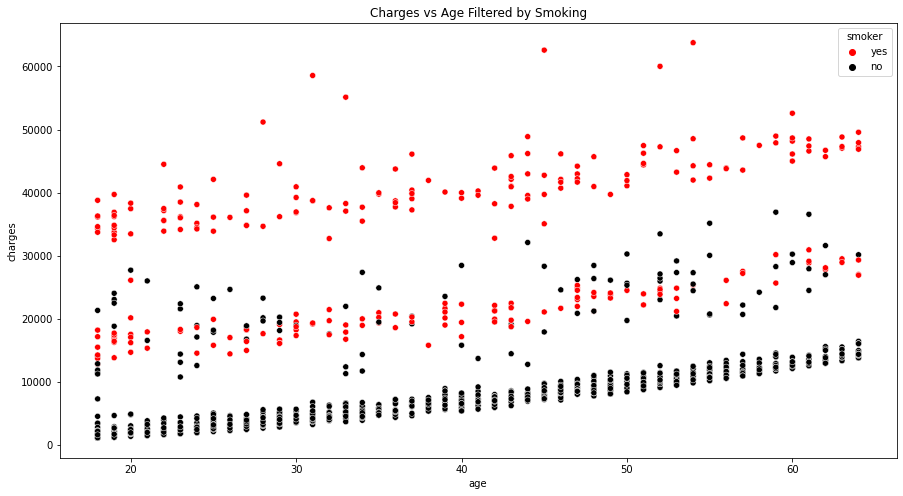

In [579]:
plt.figure(figsize=(15,8))
sns.scatterplot(data.age,data.charges,hue=data.smoker,palette=['red','black'])
plt.title('Charges vs Age Filtered by Smoking')

smokers consistently seem to have higher charges on average than non-smokers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Charges vs Age Filtered by BMI')

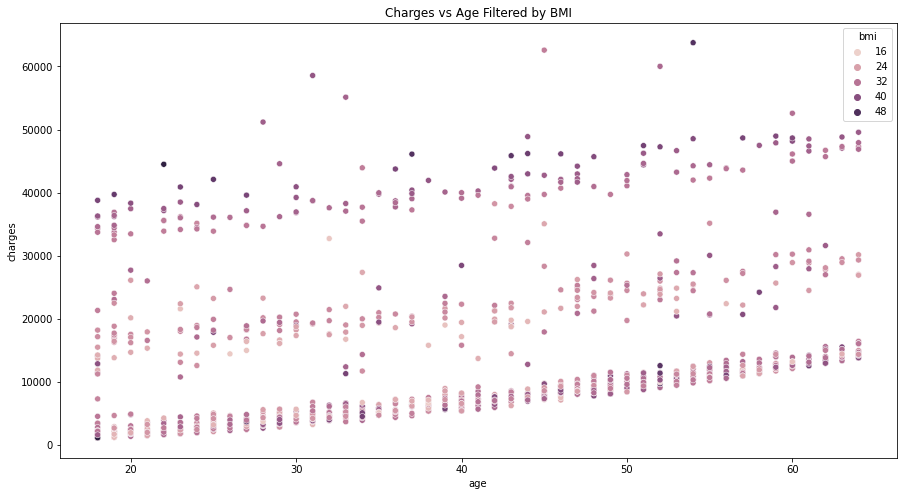

In [580]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data.age,data.charges,hue=data.bmi)
plt.title('Charges vs Age Filtered by BMI')

Members with higher BMIs, on average experience higher charges

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


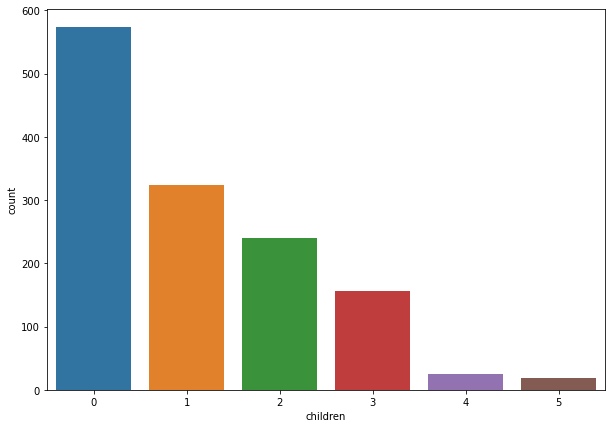

In [581]:
plt.figure(figsize=(10,7))
plt.xlabel('Number of Children')
plt.ylabel('Count')
sns.countplot(data.children)

Most have less than 3 children and very few have 4 or 5 children.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

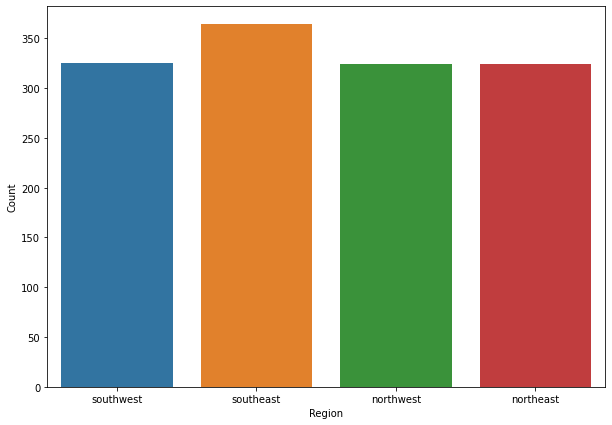

In [582]:
plt.figure(figsize=(10,7))
sns.countplot(data.region)
plt.xlabel('Region')
plt.ylabel('Count')

southeast region has more number of people which pay charges

In [583]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [584]:
a = pd.get_dummies(data['sex'])

In [585]:
b = pd.get_dummies(data['smoker'])

In [586]:
data = pd.concat([a,b,data],axis=1,join='inner')
data.drop(['sex','smoker','region'],axis=1,inplace=True)

In [587]:
data.head()

,female,male,no,yes,age,bmi,children,charges
0,1,0,0,1,19,27.900,0,16884.92400
1,0,1,1,0,18,33.770,1,1725.55230
2,0,1,1,0,28,33.000,3,4449.46200
3,0,1,1,0,33,22.705,0,21984.47061
4,0,1,1,0,32,28.880,0,3866.85520


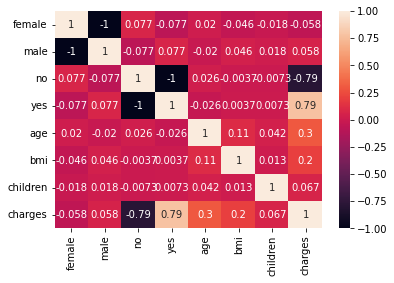

In [593]:
sns.heatmap(data.corr(),annot=True)

                             **MODEL Using All Features**

In [622]:
x = data.drop('charges',axis=1)

In [623]:
y = data['charges']

In [624]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [625]:
from sklearn.linear_model import  LinearRegression
model = LinearRegression()

In [626]:
reg = model.fit(x_train,y_train)

In [627]:
y_predicted = reg.predict(x_test)

In [628]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
r2 = r2_score(y_test,y_predicted)
print('Mean_Squared_Error: ',mse)
print('Mean_Absolute_Error: ',mae)
print('R2_Score: ',r2)

Mean_Squared_Error:  32143654.866868097
Mean_Absolute_Error:  3909.764062472099
R2_Score:  0.7515174799197021


**                                 MODEL Excluding male and female   **

In [646]:
x1 = data.iloc[:,2:6]

In [647]:
y1 = data['charges']

In [648]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=1)

In [649]:
reg = model.fit(x1_train,y1_train)

In [650]:
y_predicted_1= reg.predict(x1_test)

In [651]:
mse = mean_squared_error(y1_test,y_predicted_1)
mae = mean_absolute_error(y1_test,y_predicted_1)
r2 = r2_score(y1_test,y_predicted_1)
print('Mean_Squared_Error: ',mse)
print('Mean_Absolute_Error: ',mae)
print('R2_Score: ',r2)

Mean_Squared_Error:  31407815.88721499
Mean_Absolute_Error:  3881.8943934795593
R2_Score:  0.7572057914945624


**Model using smokers feature only**

In [653]:
x2 = data.iloc[:,2:4]

In [655]:
y2 = data['charges']

In [656]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.2,random_state=1)

In [657]:
reg = model.fit(x2_train,y2_train)

In [658]:
y_predicted_2= reg.predict(x2_test)

In [659]:
mse = mean_squared_error(y2_test,y_predicted_2)
mae = mean_absolute_error(y2_test,y_predicted_2)
r2 = r2_score(y2_test,y_predicted_2)
print('Mean_Squared_Error: ',mse)
print('Mean_Absolute_Error: ',mae)
print('R2_Score: ',r2)

Mean_Squared_Error:  45749935.52876404
Mean_Absolute_Error:  5158.198134291045
R2_Score:  0.6463358220842517


**Model using Age and Bmi Features**

In [660]:
x3 = data.iloc[:,4:6]
y3 = data['charges']

In [661]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=0.2,random_state=1)

In [662]:
reg = model.fit(x3_train,y3_train)

In [663]:
y_predicted_3= reg.predict(x3_test)

In [664]:
mse = mean_squared_error(y3_test,y_predicted_3)
mae = mean_absolute_error(y3_test,y_predicted_3)
r2 = r2_score(y3_test,y_predicted_3)
print('Mean_Squared_Error: ',mse)
print('Mean_Absolute_Error: ',mae)
print('R2_Score: ',r2)

Mean_Squared_Error:  113859366.93876016
Mean_Absolute_Error:  8610.70043460392
R2_Score:  0.11982434639527018


**Model using Bmi only**

In [671]:
x4 = data.iloc[:,5:6].values.reshape(-1,1)

In [672]:
y4 = data['charges'].values

In [673]:
x4_train,x4_test,y4_train,y4_test = train_test_split(x4,y4,test_size=0.2,random_state=1)

In [674]:
reg = model.fit(x4_train,y4_train)

In [675]:
y_predicted_4 = reg.predict(x4_test)

In [676]:
mse = mean_squared_error(y4_test,y_predicted_4)
mae = mean_absolute_error(y4_test,y_predicted_4)
r2 = r2_score(y4_test,y_predicted_4)
print('Mean_Squared_Error: ',mse)
print('Mean_Absolute_Error: ',mae)
print('R2_Score: ',r2)

Mean_Squared_Error:  129640938.0616562
Mean_Absolute_Error:  8925.614157999422
R2_Score:  -0.002173123391081777


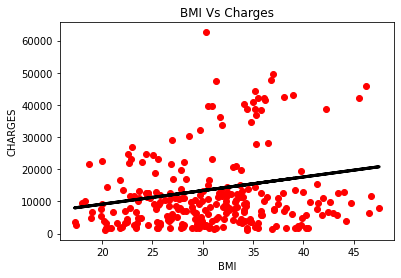

In [689]:
plt.scatter(x4_test,y4_test,color='Red')
plt.plot(x4_test,y_predicted_4,color="Black",linewidth=3)
plt.xlabel('BMI')
plt.ylabel('CHARGES')
plt.title('BMI Vs Charges')
plt.show()

*Model using Age only** 

In [681]:
x5 = data.iloc[:,4:5].values

In [682]:
y5 = data['charges'].values

In [683]:
x5_train,x5_test,y5_train,y5_test = train_test_split(x5,y5,test_size=0.2,random_state=1)

In [684]:
reg = model.fit(x5_train,y5_train)

In [685]:
y_predicted_5 = reg.predict(x5_test)

In [686]:
mse = mean_squared_error(y5_test,y_predicted_5)
mae = mean_absolute_error(y5_test,y_predicted_5)
r2 = r2_score(y5_test,y_predicted_5)
print('Mean_Squared_Error: ',mse)
print('Mean_Absolute_Error: ',mae)
print('R2_Score: ',r2)

Mean_Squared_Error:  115586706.24026854
Mean_Absolute_Error:  8599.745115999713
R2_Score:  0.10647136508526511


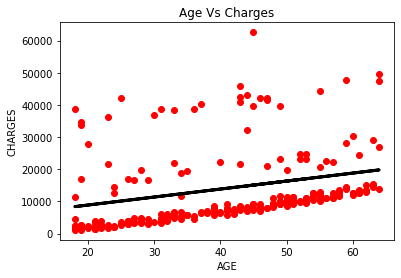

In [688]:
plt.scatter(x5_test,y5_test,color='Red')
plt.plot(x5_test,y_predicted_5,color="Black",linewidth=3)
plt.xlabel('AGE')
plt.ylabel('CHARGES')
plt.title('Age Vs Charges')
plt.show()